In [93]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
%matplotlib inline

In [94]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int,
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
data = pd.read_csv('kc_house_data.csv',dtype=dtype_dict)
data_test = pd.read_csv('wk3_kc_house_test_data.csv',dtype=dtype_dict)
data_train = pd.read_csv('wk3_kc_house_train_data.csv',dtype=dtype_dict)
data_validation = pd.read_csv('wk3_kc_house_valid_data.csv',dtype=dtype_dict)
data_subset_1 = pd.read_csv('wk3_kc_house_set_1_data.csv',dtype=dtype_dict)
data_subset_2 = pd.read_csv('wk3_kc_house_set_2_data.csv',dtype=dtype_dict)
data_subset_3 = pd.read_csv('wk3_kc_house_set_3_data.csv',dtype=dtype_dict)
data_subset_4 = pd.read_csv('wk3_kc_house_set_4_data.csv',dtype=dtype_dict)

In [95]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238.0,6819.0
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060.0,9711,1,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650.0,9711.0
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780.0,7470,1,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780.0,8113.0
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890.0,6560,2,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390.0,7570.0


# A function that returns the column raised to the given power

In [96]:
def power(feature,degree):
    my_data_frame = pd.DataFrame()
    my_data_frame['feature'] = np.power(feature,degree)
    return my_data_frame

# A polynomial data frame that takes feature and degree and returns dataframe with feature polynomial

In [97]:
def polynomial_dataframe(feature,degree):
    my_data_frame = pd.DataFrame()
    for x in range(1,degree + 1):
        my_data_frame['Feature_%s' %x] = np.power(feature,x)
    return my_data_frame

In [98]:
data = data.sort(['sqft_living','price'])

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [111]:
poly1_data = polynomial_dataframe(data['sqft_living'],1)
poly1_data['price'] = data['price']
print (poly1_data['price']).shape
print (poly1_data['Feature_1']).shape

(21613,)
(21613,)


In [103]:
model1 = lm.LinearRegression()
model1.fit(poly1_data['Feature_1'].reshape(21613,1),poly1_data['price'])

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
print model1.coef_
print model1.intercept_

[ 280.6235679]
-43580.7430945


/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


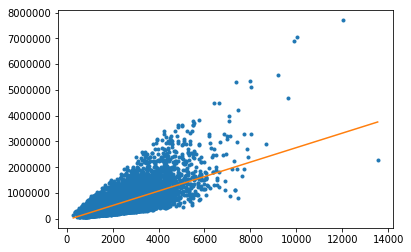

In [112]:
plt.plot(poly1_data['Feature_1'],poly1_data['price'],'.',
poly1_data['Feature_1'], model1.predict(poly1_data['Feature_1'].reshape(21613,1)),'-')

In [113]:
poly2_data = polynomial_dataframe(data['sqft_living'],2)
poly2_data['price'] = data['price']


In [116]:
model2 = lm.LinearRegression()
model2.fit(poly2_data[['Feature_1','Feature_2']],poly2_data['price'])
print model2.coef_
print model2.intercept_

[  6.79940947e+01   3.85812609e-02]
199222.279305


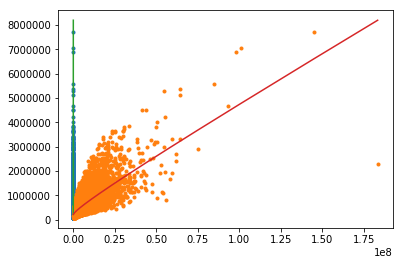

In [120]:
plt.plot(poly2_data[['Feature_1','Feature_2']],poly2_data['price'],'.',
poly2_data[['Feature_1','Feature_2']], model2.predict(poly2_data[['Feature_1','Feature_2']]),'-')

In [121]:
poly3_data = polynomial_dataframe(data['sqft_living'],3)
poly3_data['price'] = data['price']
features = list(poly3_data)
print features

['Feature_1', 'Feature_2', 'Feature_3', 'price']


In [122]:
model3 = lm.LinearRegression()
model3.fit(poly3_data[features[:-1]],poly2_data['price'])
print model3.coef_
print model3.intercept_

[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]
336819.74822


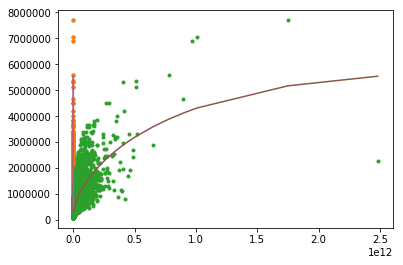

In [123]:
plt.plot(poly3_data[features[:-1]],poly3_data['price'],'.',
poly3_data[features[:-1]], model3.predict(poly3_data[features[:-1]]),'-')

In [124]:
poly15_data = polynomial_dataframe(data['sqft_living'],15)
poly15_data['price'] = data['price']
features = list(poly15_data)
print features

['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'price']


In [125]:
model15 = lm.LinearRegression()
model15.fit(poly15_data[features[:-1]],poly15_data['price'])
print model15.coef_
print model15.intercept_

[  4.56404164e-91  -6.23779018e-50   2.87786017e-56   2.78197725e-88
   1.19863929e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144115e-59   1.09771012e-55   7.43509038e-52   4.23015577e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]
537116.329638


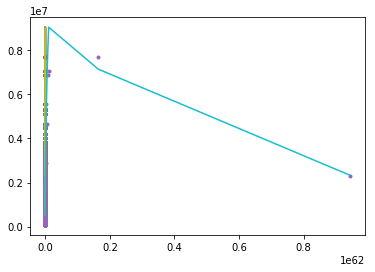

In [126]:
plt.plot(poly15_data[features[:-1]],poly15_data['price'],'.',
poly15_data[features[:-1]], model15.predict(poly15_data[features[:-1]]),'-')

In [127]:
poly15_data_subset1 = polynomial_dataframe(data_subset_1['sqft_living'],15)
poly15_data_subset1['price'] = data_subset_1['price']
features = list(poly15_data)


['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'price']


In [128]:
model15_subset1 = lm.LinearRegression()
model15_subset1.fit(poly15_data_subset1[features[:-1]],poly15_data_subset1['price'])
print model15_subset1.coef_
print model15_subset1.intercept_

[  3.05794168e-90   2.21229708e-49   8.37177586e-55   1.21888889e-88
   3.23082736e-74   1.10340647e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52]
539058.818668


# PLot on subset 1

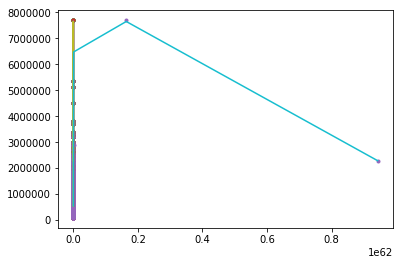

In [129]:
plt.plot(poly15_data_subset1[features[:-1]],poly15_data_subset1['price'],'.',
poly15_data_subset1[features[:-1]], model15_subset1.predict(poly15_data_subset1[features[:-1]]),'-')

# Plot on subset model 2

[  2.68007766e-77  -1.28313530e-39  -1.45840380e-44   8.23309543e-50
   1.04404871e-53   1.35479893e-58   3.62867884e-55   1.49807489e-51
   5.73974461e-48   1.95158341e-44   5.37897065e-41   9.38035579e-38
  -3.62478330e-41   4.63968383e-45  -1.96500572e-49]
506812.109343


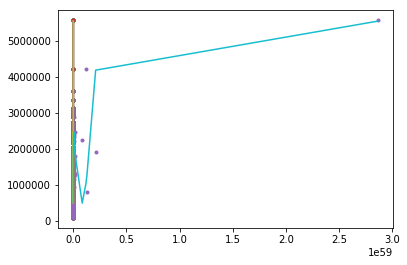

In [131]:
poly15_data_subset2 = polynomial_dataframe(data_subset_2['sqft_living'],15)
poly15_data_subset2['price'] = data_subset_2['price']
features = list(poly15_data_subset2)
model15_subset2 = lm.LinearRegression()
model15_subset2.fit(poly15_data_subset2[features[:-1]],poly15_data_subset2['price'])
print model15_subset2.coef_
print model15_subset2.intercept_
plt.plot(poly15_data_subset2[features[:-1]],poly15_data_subset2['price'],'.',
poly15_data_subset2[features[:-1]], model15_subset2.predict(poly15_data_subset2[features[:-1]]),'-')

# PLot on subset 3

[  2.83751934e-88  -3.80811673e-49  -8.52600697e-55  -3.98272978e-59
   1.57170169e-72   4.27894908e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51]
530874.316653


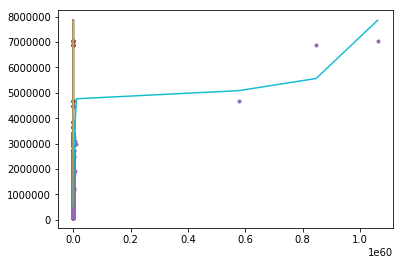

In [132]:
poly15_data_subset3 = polynomial_dataframe(data_subset_3['sqft_living'],15)
poly15_data_subset3['price'] = data_subset_3['price']
features = list(poly15_data_subset3)
model15_subset3 = lm.LinearRegression()
model15_subset3.fit(poly15_data_subset3[features[:-1]],poly15_data_subset3['price'])
print model15_subset3.coef_
print model15_subset3.intercept_
plt.plot(poly15_data_subset3[features[:-1]],poly15_data_subset3['price'],'.',
poly15_data_subset3[features[:-1]], model15_subset3.predict(poly15_data_subset3[features[:-1]]),'-')

[  1.37062035e-76  -7.34929304e-40  -2.99040235e-44  -3.69992257e-49
  -4.17619486e-53   1.30559251e-54   1.27051326e-54   4.87799084e-51
   1.73524691e-47   5.46982653e-44   1.39568452e-40   2.25011155e-37
  -9.43820708e-41   1.31553951e-44  -6.09073061e-49]
494822.426631


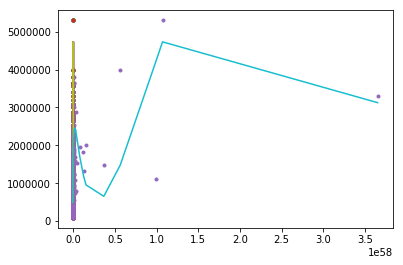

In [133]:
poly15_data_subset4 = polynomial_dataframe(data_subset_4['sqft_living'],15)
poly15_data_subset4['price'] = data_subset_4['price']
features = list(poly15_data_subset4)
model15_subset4 = lm.LinearRegression()
model15_subset4.fit(poly15_data_subset4[features[:-1]],poly15_data_subset4['price'])
print model15_subset4.coef_
print model15_subset4.intercept_
plt.plot(poly15_data_subset4[features[:-1]],poly15_data_subset4['price'],'.',
poly15_data_subset4[features[:-1]], model15_subset4.predict(poly15_data_subset4[features[:-1]]),'-')

# Lets test for the best polynomial model

In [145]:
poly_data_15 = polynomial_dataframe(data_train['sqft_living'],15)
poly_data_15['price'] = data_train['price']
poly_data_15.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,price
0,1960.0,3841600.0,7.529536e+09,1.475789e+13,2.892547e+16,5.669391e+19,1.111201e+23,2.177953e+26,4.268789e+29,8.366826e+32,1.639898e+36,3.214200e+39,6.299831e+42,1.234767e+46,2.420143e+49,604000.0
1,5420.0,29376400.0,1.592201e+11,8.629729e+14,4.677313e+18,2.535104e+22,1.374026e+26,7.447222e+29,4.036394e+33,2.187726e+37,1.185747e+41,6.426750e+44,3.483299e+48,1.887948e+52,1.023268e+56,1225000.0
2,1160.0,1345600.0,1.560896e+09,1.810639e+12,2.100342e+15,2.436396e+18,2.826220e+21,3.278415e+24,3.802961e+27,4.411435e+30,5.117265e+33,5.936027e+36,6.885791e+39,7.987518e+42,9.265521e+45,468000.0
3,1430.0,2044900.0,2.924207e+09,4.181616e+12,5.979711e+15,8.550987e+18,1.222791e+22,1.748591e+25,2.500485e+28,3.575694e+31,5.113243e+34,7.311937e+37,1.045607e+41,1.495218e+44,2.138162e+47,310000.0
4,1370.0,1876900.0,2.571353e+09,3.522754e+12,4.826172e+15,6.611856e+18,9.058243e+21,1.240979e+25,1.700142e+28,2.329194e+31,3.190996e+34,4.371664e+37,5.989180e+40,8.205177e+43,1.124109e+47,400000.0


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
RSS OF  2  Degree polynomial is  6.290978863e+14
RSS OF  3  Degree polynomial is  6.23955062707e+14
RSS OF  4  Degree polynomial is  6.25820280252e+14
RSS OF  5  Degree polynomial is  6.29987335742e+14
RSS OF  6  Degree polynomial is  6.28224826758e+14
RSS OF  7  Degree polynomial is  5.66268533633e+14
RSS OF  8  Degree polynomial is  1.073845095e+15
RSS OF  9  Degree polynomial is  7.08777613767e+15
RSS OF  10  Degree polynomial is  4.52985980008e+16
RSS OF  11  Degree polynomial is  2.47100346738e+17
RSS OF  12  Degree polynomial is  1.19329900556e+18
RSS OF  13  Degree polynomial is  4.98771706594e+18
RSS OF  14  Degree polynomial is  7.61623002132e+17
RSS OF  15  Degree polynomial is  2.2975609251e+18
RSS OF  16  Degree polynomial is  6.9550380964e+18


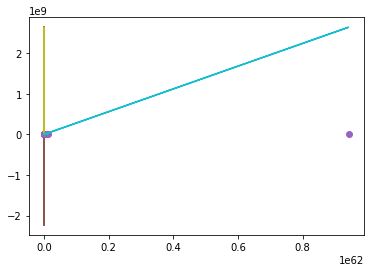

In [163]:
model = [0]*16
prediction = [0]*16
error = [0]*16
rss = [0]*16
print model
for i in range(1,16):
    model[i] = lm.LinearRegression()
    x = poly_data_15[features[:i]]
    y = poly_data_15['price']
    model[i].fit(x,y)
    
    validation_data_15 = polynomial_dataframe(data_validation['sqft_living'],15)
    validation_data_15['price'] = data_validation['price']
    validation_x = validation_data_15[features[:i]]
    validation_y = validation_data_15['price']
    prediction[i] = model[i].predict(validation_x)
    error[i] = validation_y - prediction[i]
    rss[i] = (error[i]**2).sum()
    plt.plot(validation_x,validation_y,'o',validation_x,prediction[i])
    print "RSS OF ",i+1," Degree polynomial is ",rss[i]



    


# 8 Degree model gives the LEAST rss

In [ ]:
poly_data_test = polynomial_dataframe(data_test['sqft_living'],8)
poly_data_15['price'] = data_train['price']
poly_data_15.head()